<center><h1>NIH chest 14 disease exploration </h1></center>

<h3>dataset:</h3>

NIH-chest14 published by \cite{wang2017chestxray}. This ChestX-ray dataset consists of 112,120 frontal X-ray images from 30,805 unique patients. Each image is labeled with one or more of fourteen common thoracic pathologies, including atelectasis, consolidation, infiltration, pneumothorax, edema, emphysema, fibrosis, effusion, pneumonia, pleural thickening, cardiomegaly, nodule, mass, and hernia. These labels were extracted from the associated radiological reports using natural language processing techniques. The extracted labels are expected to have an accuracy greater than 90%. 

<h3>website:</h3>
https://nihcc.app.box.com/v/ChestXray-NIHCC


<h3>reference</h3>
@InProceedings{wang2017chestxray,
author = {Wang, Xiaosong and Peng, Yifan and Lu, Le and Lu, Zhiyong and Bagheri, Mohammadhadi
and Summers, Ronald},
title = {ChestX-ray8: Hospital-scale Chest X-ray Database and Benchmarks on Weakly-Supervised
Classification and Localization of Common Thorax Diseases},
booktitle = {2017 IEEE Conference on Computer Vision and Pattern Recognition (CVPR)},
pages = {3462--3471},
year = {2017}
}
Questions Comments: (rms@nih.gov)
Limitations: 1) The image labels are NLP extracted so there would be some erroneous labels
but the NLP labelling accuracy is estimated to be >90%. 2) Very limited numbers of disease
region bounding boxes. 3) Chest x-ray radiology reports are not anticipated to be publicly
shared. Parties who use this public dataset are encouraged to share their “updated” image
labels and/or new bounding boxes in their own studied later, maybe through manual annotation.
Acknowledgement: This work was supported by the Intramural Research Program of the NIH
Clinical Center (clinicalcenter.nih.gov) and National Library of Medicine (www.nlm.nih.gov). We
thank NVIDIA Corporation for the GPU donations.
Reference:
[1] Xiaosong Wang, Yifan Peng, Le Lu, Zhiyong Lu, Mohammadhadi Bagheri, Ronald Summers,
ChestX-ray8: Hospital-scale Chest X-ray Database and Benchmarks on Weakly-Supervised
Classification and Localization of Common Thorax Diseases, IEEE CVPR, pp. 3462-3471, 2017
[2] Hoo-chang Shin, Kirk Roberts, Le Lu, Dina Demner-Fushman, Jianhua Yao, Ronald M.
Summers, Learning to Read Chest X-Rays: Recurrent Neural Cascade Model for Automated
Image Annotation, IEEE CVPR, pp. 2497-2506, 2016

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pandas as pd


root_dir = r"E:\迅雷下载\ChestX-ray14"
csv_path = os.path.join(root_dir, "data/Data_Entry_2017_v2020.csv")
testing = os.path.join(root_dir, "data/test_list.txt")
training_validation = os.path.join(root_dir, "data/train_val_list.txt")


In [6]:
NIH_chest14_dataset = pd.read_csv(csv_path)
size_of_dataset = len(NIH_chest14_dataset)
print(f"the size of whole dataset is {size_of_dataset}")
NIH_chest14_dataset.head()
NIH_chest14_dataset_AP_PA = NIH_chest14_dataset[NIH_chest14_dataset["View Position"].isin(["AP", "PA"])] 
print(f"the size of AP_PA dataset is {len(NIH_chest14_dataset_AP_PA)}")
NIH_chest14_dataset_AP_PA

the size of whole dataset is 112120
the size of AP_PA dataset is 112120


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168
...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,38,M,PA,2048,2500,0.168,0.168
112116,00030802_000.png,No Finding,0,30802,28,M,PA,2048,2500,0.168,0.168
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168
112118,00030804_000.png,No Finding,0,30804,29,F,PA,2048,2500,0.168,0.168


In [7]:
if NIH_chest14_dataset_AP_PA.isna().any().any():
    print("There are NaN values in the DataFrame.")
else:
    print("There are no NaN values in the DataFrame.")
NIH_chest14_dataset_AP_PA.isna().any()

There are no NaN values in the DataFrame.


Image Index                    False
Finding Labels                 False
Follow-up #                    False
Patient ID                     False
Patient Age                    False
Patient Gender                 False
View Position                  False
OriginalImage[Width            False
Height]                        False
OriginalImagePixelSpacing[x    False
y]                             False
dtype: bool

In [8]:
if NIH_chest14_dataset.isna().any().any():
    print("There are NaN values in the DataFrame.")
else:
    print("There are no NaN values in the DataFrame.")
NIH_chest14_dataset.isna().any()

There are no NaN values in the DataFrame.


Image Index                    False
Finding Labels                 False
Follow-up #                    False
Patient ID                     False
Patient Age                    False
Patient Gender                 False
View Position                  False
OriginalImage[Width            False
Height]                        False
OriginalImagePixelSpacing[x    False
y]                             False
dtype: bool

In [9]:
labels = NIH_chest14_dataset_AP_PA["Finding Labels"]
labels = np.array(labels)
labels

def count_disease(labels):
  temp = []
  for entity in labels :
    temp.extend(entity.split("|"))
  return temp

   
temp = count_disease(labels)

In [10]:
temp = np.array(temp)
unique_elements, counts = np.unique(temp, return_counts=True)
labels_count_dict = {}
# 打印结果
for element, count in zip(unique_elements, counts):
    print(f'Element {element} appears {count} times.')
    labels_count_dict[element] = count

Element Atelectasis appears 11559 times.
Element Cardiomegaly appears 2776 times.
Element Consolidation appears 4667 times.
Element Edema appears 2303 times.
Element Effusion appears 13317 times.
Element Emphysema appears 2516 times.
Element Fibrosis appears 1686 times.
Element Hernia appears 227 times.
Element Infiltration appears 19894 times.
Element Mass appears 5782 times.
Element No Finding appears 60361 times.
Element Nodule appears 6331 times.
Element Pleural_Thickening appears 3385 times.
Element Pneumonia appears 1431 times.
Element Pneumothorax appears 5302 times.


In [11]:
labels = NIH_chest14_dataset["Finding Labels"]
labels = np.array(labels)
labels

def count_disease(labels):
  temp = []
  for entity in labels :
    temp.extend(entity.split("|"))
  return temp

   
temp = count_disease(labels)

temp = np.array(temp)
unique_elements, counts = np.unique(temp, return_counts=True)
labels_count_dict = {}
# 打印结果
for element, count in zip(unique_elements, counts):
    print(f'Element {element} appears {count} times.')
    labels_count_dict[element] = count

Element Atelectasis appears 11559 times.
Element Cardiomegaly appears 2776 times.
Element Consolidation appears 4667 times.
Element Edema appears 2303 times.
Element Effusion appears 13317 times.
Element Emphysema appears 2516 times.
Element Fibrosis appears 1686 times.
Element Hernia appears 227 times.
Element Infiltration appears 19894 times.
Element Mass appears 5782 times.
Element No Finding appears 60361 times.
Element Nodule appears 6331 times.
Element Pleural_Thickening appears 3385 times.
Element Pneumonia appears 1431 times.
Element Pneumothorax appears 5302 times.


In [12]:
labels_count_dict
labels_distribution = {}
for key, value in labels_count_dict.items():
  disease = key
  positive = value
  negative = size_of_dataset - value
  labels_distribution [disease] = [positive, negative] 
labels_distribution['diagnosis'] = ["positive", "negative"]
df = pd.DataFrame(labels_distribution,  )
# df = df.set_index('diagnosis')
# df
  

### label ratios

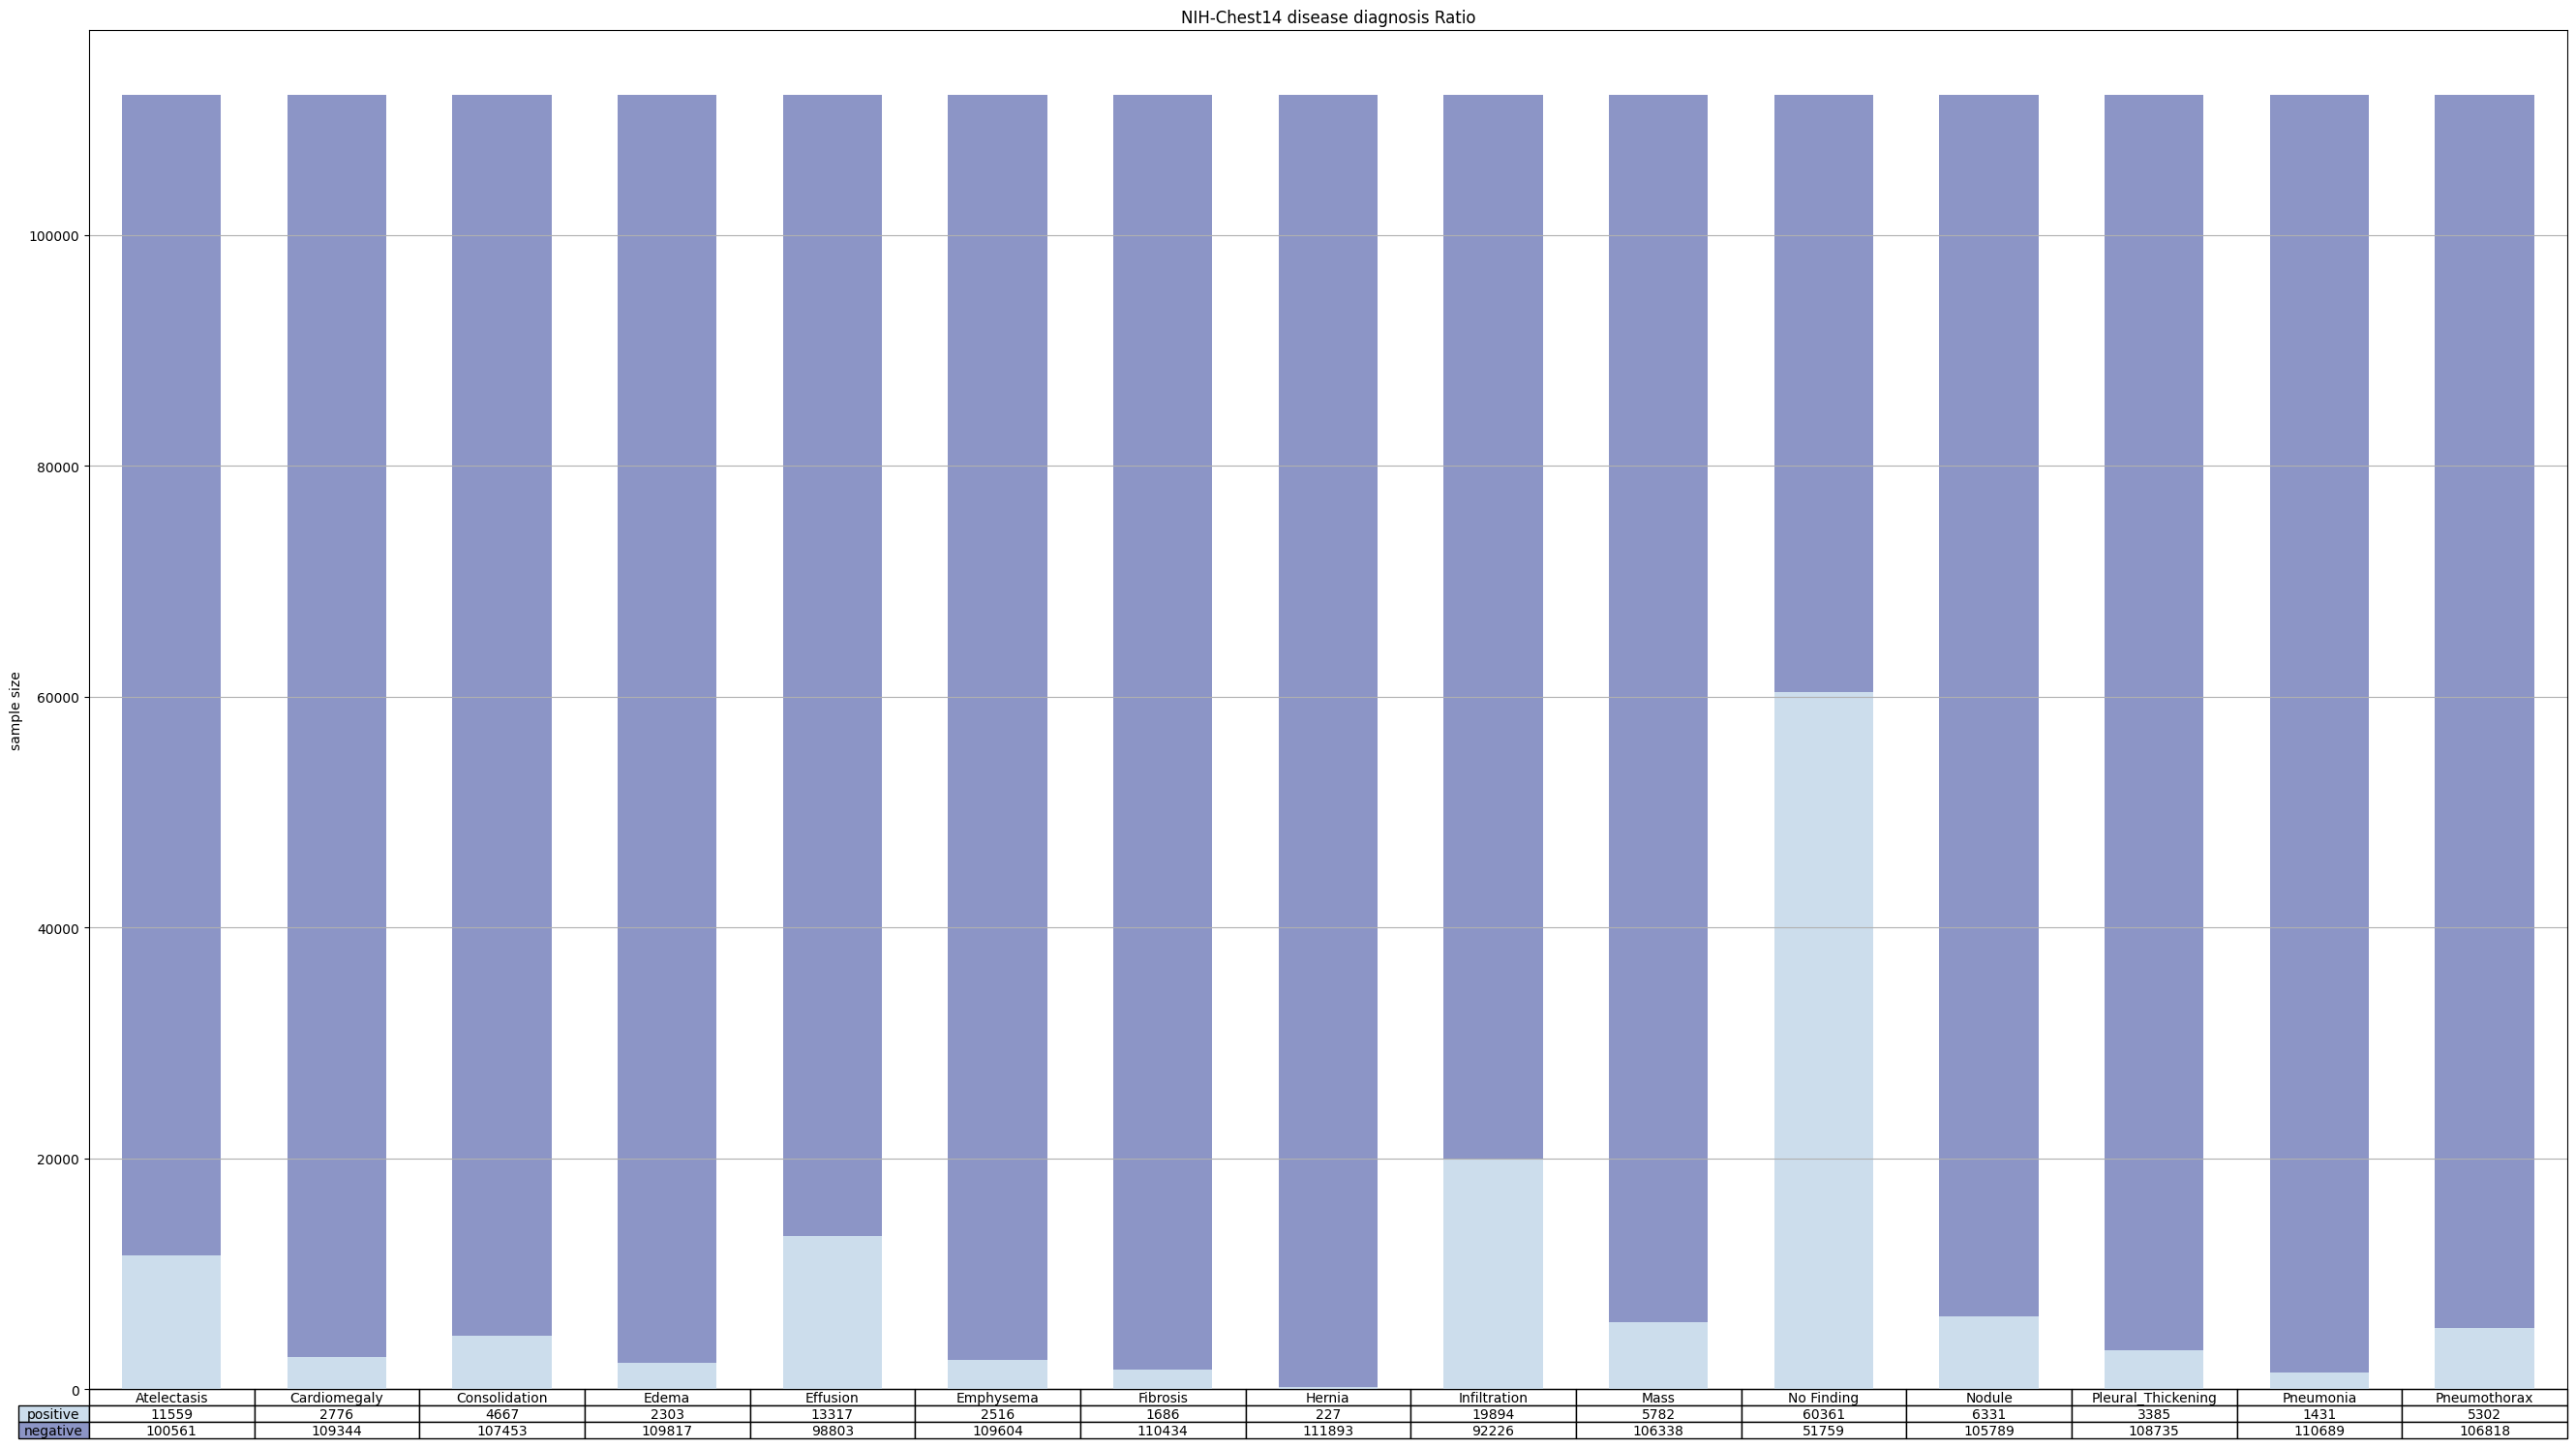

In [15]:
values = np.arange(0, 2500, 500)
value_increment = 1000
plt.figure(figsize=(16*2, 9*2)) 
plt.grid()
# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0.2, 0.5, len(df)))
# print(colors)
n_rows = len(df)
# print(n_rows)
index = np.arange(len(df.columns)-1) + 0
# print(f"index: {index}")
bar_width = 0.6

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(df.columns)-1)
# print(y_offset)
# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    # print(f"df.iloc[row, :]: \n{df.iloc[row, :-1]}")
    # print(f"bar_width: {bar_width}"
    tem = y_offset
    plt.bar(index, df.iloc[row, :-1], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + df.iloc[row, :-1]
    # print(y_offset)
    cell_text.append([int(x) for x in y_offset])

# Reverse colors and text labels to display the last value at the top.
# colors = colors[::-1]
# print(type(cell_text))
# print(cell_text)
# cell_text.reverse()
cell_text = np.array(cell_text)
cell_text[-1] = cell_text[-1] - cell_text[0]

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=df['diagnosis'],
                      rowColours=colors,
                      colLabels=df.columns,
                      loc='bottom',
                      rowLoc = "center", 
                      cellLoc = "center")

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.1, bottom=0.1)

# Add label and title
plt.ylabel(f"sample size")
# plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.xlim(-0.5, 14.5)
plt.title('NIH-Chest14 disease diagnosis Ratio')
plt.savefig("../../imgs/NIH-Chest14_diagnosis Ratio.png")
# Dislay the chart
plt.show()
print()


在labels中不存在NA属性

In [16]:
labels = NIH_chest14_dataset["Finding Labels"]
max_co_occurance  = 0
for a in labels:
  tem = a.split("|")
  if len(tem) > max_co_occurance:
    max_co_occurance = len(tem)
    
print(f"{max_co_occurance} is the max co-occurance number")

9 is the max co-occurance number


---
### training and testing 

In [17]:
train_val = pd.read_csv(training_validation, header=None)
print(f"the size of training and validation dataset is {len(train_val)}")
test = pd.read_csv(testing, header=None)
print(f"the size of testing dataset is {len(test)}")


the size of training and validation dataset is 86524
the size of testing dataset is 25596


In [20]:
NIH_chest14_dataset["View Position"].value_counts()

View Position
PA    67310
AP    44810
Name: count, dtype: int64

在当前的setting中，应为record是针对对每一张image的labeling，因此在这个数据集合中不区分AP 和 PA

In [41]:
train_val = train_val[0].to_list()
print(len(train_val))
test = test[0].to_list()
print(len(test))

86524
25596


### images

In [56]:
NIH_chest14_dataset.head(10)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN
5,00000003_001.png,Hernia,1,3,74,F,PA,2500,2048,0.168,0.168,NaN
6,00000003_002.png,Hernia,2,3,75,F,PA,2048,2500,0.168,0.168,NaN
7,00000003_003.png,Hernia|Infiltration,3,3,76,F,PA,2698,2991,0.143,0.143,NaN
8,00000003_004.png,Hernia,4,3,77,F,PA,2500,2048,0.168,0.168,NaN
9,00000003_005.png,Hernia,5,3,78,F,PA,2686,2991,0.143,0.143,NaN


In [59]:
NIH = r'E:\\NIH_chest14_dataset'

### training and testing 

In [27]:
training = r"E:/NIH_chest14_dataset/train_val_list.txt"
testing = r"E:/NIH_chest14_dataset/test_list.txt"

In [39]:
# Open the file in read mode
with open(training, 'r') as file:
    # Read lines from the file and store them in a list
    training_samples = file.readlines()

with open(testing, 'r') as file:
    # Read lines from the file and store them in a list
    testing_samples = file.readlines()

training_samples = [sample[:-1] for sample in training_samples]
testing_samples = [sample[:-1] for sample in testing_samples]
# Print the list of training samples
print(f"the size of training samples: {len(training_samples)}")
print(f"the size of testing samples: {len(testing_samples)}")
print(f"the total number of samples: {len(testing_samples) + len(training_samples)}")


the size of training samples: 86524
the size of testing samples: 25596
the total number of samples: 112120


--- 
making dataset

In [50]:
finding_labels = NIH_chest14_dataset["Finding Labels"]
labels_dist = {}
number = 0
for label in finding_labels:
  if "|" in label:
    dis = label.split("|")
    for each_dis in dis:
      if each_dis not in labels_dist.keys():
        labels_dist[each_dis] = number
        number += 1
  else:
    if label not in labels_dist.keys():
      labels_dist[label] = number
      number += 1
labels_dist


{'Cardiomegaly': 0,
 'Emphysema': 1,
 'Effusion': 2,
 'No Finding': 3,
 'Hernia': 4,
 'Infiltration': 5,
 'Mass': 6,
 'Nodule': 7,
 'Atelectasis': 8,
 'Pneumothorax': 9,
 'Pleural_Thickening': 10,
 'Pneumonia': 11,
 'Fibrosis': 12,
 'Edema': 13,
 'Consolidation': 14}

In [59]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

# 读取数据
csv_file_path = 'path/to/your/csvfile.csv'
df = NIH_chest14_dataset
# 分割多标签
df['Finding Labels'] = df['Finding Labels'].str.split('|')

# 多标签二进制编码
mlb = MultiLabelBinarizer()
encoded_labels = mlb.fit_transform(df['Finding Labels'])

# 将编码后的标签转换为 DataFrame
encoded_labels_df = pd.DataFrame(encoded_labels, columns=mlb.classes_)

# 合并 Image Index 和编码后的标签
result_df = pd.concat([df[['Image Index']], encoded_labels_df], axis=1)

# 保存处理后的数据到新的 CSV 文件
output_csv_file_path = 'processed_finding_labels.csv'
result_df.to_csv(output_csv_file_path, index=False)

print(f"Processed data saved to {output_csv_file_path}")



Processed data saved to processed_finding_labels.csv


In [60]:
test = pd.read_csv("processed_finding_labels.csv")
test.head()

,Image Index,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,00000001_002.png,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,00000003_001.png,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [61]:
test[:].sum()

Image Index           00000001_000.png00000001_001.png00000001_002.p...
Atelectasis                                                       11559
Cardiomegaly                                                       2776
Consolidation                                                      4667
Edema                                                              2303
Effusion                                                          13317
Emphysema                                                          2516
Fibrosis                                                           1686
Hernia                                                              227
Infiltration                                                      19894
Mass                                                               5782
No Finding                                                        60361
Nodule                                                             6331
Pleural_Thickening                                              

In [69]:

import os
import tarfile

# 文件夹路径
folder_path = r'E:\迅雷下载\ChestX-ray14\data\images'

# 创建用于存放解压后文件的文件夹
output_folder = os.path.join(folder_path, 'images_1')
os.makedirs(output_folder, exist_ok=True)

# 遍历文件夹中的所有文件
for file_name in os.listdir(folder_path):
    print(file_name)
    if file_name.endswith('.gz'):
        print(file_name)
        # 构建 tar 文件的完整路径
        file_path = os.path.join(folder_path, file_name)
        
        # 解压 tar 文件到 output_folder 中
        with tarfile.open(file_path, 'r') as tar:
            tar.extractall(output_folder)

print("所有 .tar 文件已成功解压到 images 文件夹中。")


images_1
images_001.tar.gz
images_001.tar.gz
images_002.tar.gz
images_002.tar.gz
images_003.tar.gz
images_003.tar.gz
images_004.tar.gz
images_004.tar.gz
images_005.tar.gz
images_005.tar.gz
images_006.tar.gz
images_006.tar.gz
images_007.tar.gz
images_007.tar.gz
images_008.tar.gz
images_008.tar.gz
images_009.tar.gz
images_009.tar.gz
images_010.tar.gz
images_010.tar.gz
images_011.tar.gz
images_011.tar.gz
images_012.tar.gz
images_012.tar.gz
images_1
所有 .tar 文件已成功解压到 images 文件夹中。


---
## co-occurrence of labels in the dataset

In [8]:
NIH_CXR14_multi_hot = "/public_bme/data/lds/CXR_datasets/NIH_chest14_dataset/NIH_CXR14_multi_hot.csv"
NIH_dataset = pd.read_csv(NIH_CXR14_multi_hot)
print(NIH_dataset)

             Image Index  Atelectasis  Cardiomegaly  Consolidation  Edema  \
0       00000001_000.png            0             1              0      0   
1       00000001_001.png            0             1              0      0   
2       00000001_002.png            0             1              0      0   
3       00000002_000.png            0             0              0      0   
4       00000003_001.png            0             0              0      0   
...                  ...          ...           ...            ...    ...   
112115  00030801_001.png            0             0              0      0   
112116  00030802_000.png            0             0              0      0   
112117  00030803_000.png            0             0              0      0   
112118  00030804_000.png            0             0              0      0   
112119  00030805_000.png            0             0              0      0   

        Effusion  Emphysema  Fibrosis  Hernia  Infiltration  Mass  No Findi

In [32]:
def get_co_occurrence_matrix(df = NIH_dataset):
    # 移除 'Image Index' 列，只保留标签列
    labels_df = df.drop(columns=['Image Index'])

    # 计算共现矩阵
    co_occurrence_matrix = labels_df.T.dot(labels_df)

    # 将对角线元素置为0，因为我们只关心标签之间的共现
    np.fill_diagonal(co_occurrence_matrix.values, 0)
    return co_occurrence_matrix

co_occurrence_matrix = get_co_occurrence_matrix()
print(co_occurrence_matrix.sum(axis=1))
co_occurrence_matrix

Atelectasis           11898
Cardiomegaly           2830
Consolidation          5883
Edema                  2823
Effusion              15066
Emphysema              2700
Fibrosis               1487
Hernia                  175
Infiltration          15886
Mass                   6210
No Finding                0
Nodule                 5734
Pleural_Thickening     4056
Pneumonia              1907
Pneumothorax           4959
dtype: int64


,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
Atelectasis,0,370,1223,221,3275,424,220,40,3264,739,0,590,496,262,774
Cardiomegaly,370,0,169,127,1063,44,52,7,587,102,0,108,111,41,49
Consolidation,1223,169,0,162,1287,103,79,4,1221,610,0,428,251,123,223
Edema,221,127,162,0,593,30,9,3,981,129,0,131,64,340,33
Effusion,3275,1063,1287,593,0,359,188,21,4000,1254,0,912,849,269,996
Emphysema,424,44,103,30,359,0,36,4,449,215,0,115,151,23,747
Fibrosis,220,52,79,9,188,36,0,8,345,117,0,166,176,11,80
Hernia,40,7,4,3,21,4,8,0,33,25,0,10,8,3,9
Infiltration,3264,587,1221,981,4000,449,345,33,0,1159,0,1546,750,605,946
Mass,739,102,610,129,1254,215,117,25,1159,0,0,906,452,71,431


In [16]:
matrix = co_occurrence_matrix.values.tolist()
names = co_occurrence_matrix.index.tolist()

In [33]:
import pandas as pd
import numpy as np
import math
from d3blocks import D3Blocks

# 假设 CHEXPERT_LABELS 是你的标签列表
CHEXPERT_LABELS = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']

# 读取数据
df = pd.read_csv(NIH_CXR14_multi_hot)

# 移除 'Image Index' 列，只保留标签列
labels_df = df.drop(columns=['Image Index'])

# 计算共现矩阵
co_occurrence_matrix = labels_df.T.dot(labels_df).values

# 将对角线元素置为0，因为我们只关心标签之间的共现
np.fill_diagonal(co_occurrence_matrix, 0)

# 创建空的 DataFrame
df_undirected = pd.DataFrame(columns=['source', 'target', 'weight'])

# 填充 DataFrame
for i, source_label in enumerate(CHEXPERT_LABELS):
    for j, target_label in enumerate(CHEXPERT_LABELS):
        if i < j:  # 只处理上三角矩阵，确保只添加一次连接
            weight = co_occurrence_matrix[i, j]
            df_undirected = pd.concat([df_undirected, pd.DataFrame({'source': [source_label], 'target': [target_label], 'weight': [weight]})], ignore_index=True)

print(df_undirected)

# 创建 D3Blocks 实例
d3 = D3Blocks(chart="Chord", frame=False)

# 设置节点和边的属性
d3.set_node_properties(df_undirected, opacity=0.5, cmap='tab20')
d3.set_edge_properties(df_undirected, color='source', opacity='source')

# 显示图表
d3.show(title="training", arrowhead=-1, filepath="./NIH_14.html")


[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Chord]
[d3blocks] >INFO> filepath is set to [/tmp/d3blocks/chord.html]
[d3blocks] >INFO> Node properties are set.
[d3blocks] >INFO> Edge properties are set.
[d3blocks] >INFO> Set [title]: training
[d3blocks] >INFO> Set [arrowhead]: -1
[d3blocks] >INFO> Set [filepath]: ./NIH_14.html
[d3blocks] >INFO> File already exists and will be overwritten: [./NIH_14.html]


                 source         target weight
0           Atelectasis   Cardiomegaly    370
1           Atelectasis  Consolidation   1223
2           Atelectasis          Edema    221
3           Atelectasis       Effusion   3275
4           Atelectasis      Emphysema    424
..                  ...            ...    ...
100              Nodule      Pneumonia     70
101              Nodule   Pneumothorax    341
102  Pleural_Thickening      Pneumonia     48
103  Pleural_Thickening   Pneumothorax    289
104           Pneumonia   Pneumothorax     41

[105 rows x 3 columns]


[d3blocks] >INFO> Open browser: /home_data/home/v-liudsh/coding/constrastive_P/diagnosisP/exchange/Fine-Grained_Features_Alignment_via_Constrastive_Learning/Notebooks/NIH_14.html


In [23]:
df_undirected[df_undirected["source"] == "Hernia"]

,source,target,weight
77,Hernia,Infiltration,33
78,Hernia,Mass,25
79,Hernia,No Finding,0
80,Hernia,Nodule,10
81,Hernia,Pleural_Thickening,8
82,Hernia,Pneumonia,3
83,Hernia,Pneumothorax,9


---
为了统一是14分类的任务，将NIH中的NO found从label中剔除 

In [8]:
import pandas as pd

training = "/public_bme/data/lds/CXR_datasets/NIH_chest14_dataset/training_val_dataset.csv"
testing = "/public_bme/data/lds/CXR_datasets/NIH_chest14_dataset/testing_dataset.csv"

training_data = pd.read_csv(training)
testing_data = pd.read_csv(testing)
training_data

,Image Index,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,00000001_002.png,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,00000004_000.png,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86519,00030789_000.png,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
86520,00030793_000.png,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
86521,00030795_000.png,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
86522,00030801_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [10]:
training_14 = training_data.drop("No Finding", axis=1)
testing_14 = testing_data.drop("No Finding", axis=1)

training_14.to_csv("/public_bme/data/lds/CXR_datasets/NIH_chest14_dataset/training_dataset_14.csv", index=False)
testing_14.to_csv("/public_bme/data/lds/CXR_datasets/NIH_chest14_dataset/testing_dataset_14.csv", index=False)